In [6]:
import cv2
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import random

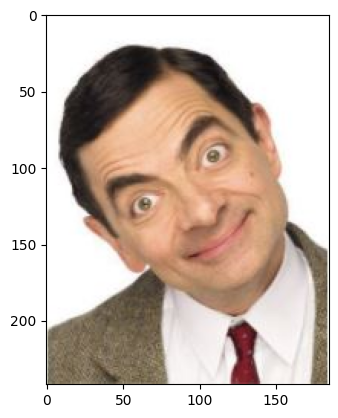

In [16]:
img = plt.imread('input/mrbean.jpg')
plt.imshow(img)
plt.show()

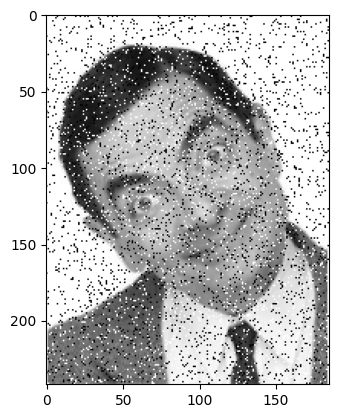

In [17]:
img = cv2.imread('input/mrbean.jpg', 0)
row, col = img.shape
for i in range(row):
    for j in range(col):
        noise = random.randint(0, row-1)
        if noise % (row//30) == 0:
            img[i, j] = random.choice([0, 255])

cv2.imwrite('output/mrbean_noise.jpg', img)
plt.imshow(img, cmap='gray')

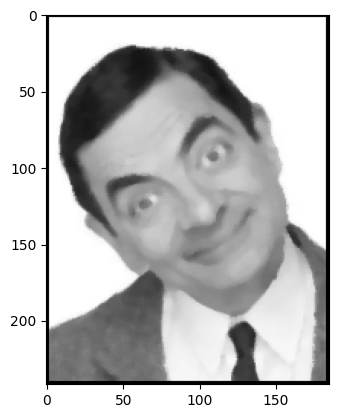

In [14]:
result = np.zeros((row, col))

for i in range(2, row-2):
    for j in range(2, col-2):
        small_img = img[i-2:i+3, j-2:j+3]
        small_img_1d = small_img.reshape(25)
        small_img_1d_sorted = np.sort(small_img_1d)
        result[i, j] = small_img_1d_sorted[13]

cv2.imwrite('output/mrbean_withoutNoise.jpg', result)        
plt.imshow(result, cmap='gray')

1/1 [==============================] - 0s 146ms/step


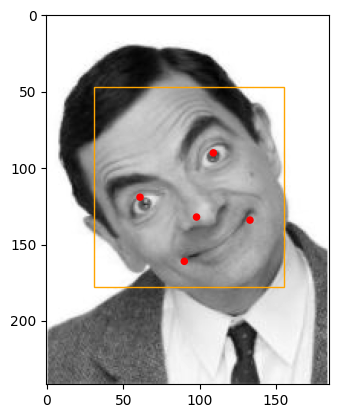

In [43]:
face_detector = MTCNN()

def draw_facebox_and_keypoints(filename, result_list):
    data = plt.imread(filename)
    data_gray = data.mean(axis=-1)
    plt.imshow(data_gray, cmap='gray')
    pic = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='orange')
        pic.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            pic.add_patch(dot)
    plt.show()

filename = 'input/mrbean.jpg'
results = face_detector.detect_faces(plt.imread(filename))
draw_facebox_and_keypoints(filename, results)


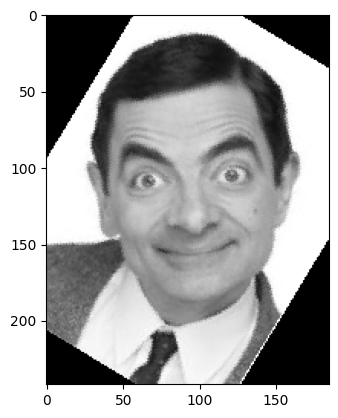

In [22]:
def euclidean_distance(source_representation, test_representation):
    euclidean_distance = np.linalg.norm(source_representation - test_representation)
    return euclidean_distance

def alignment_procedure(img, left_eye, right_eye):
    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1

    a = euclidean_distance(np.array(left_eye), np.array(point_3rd))
    b = euclidean_distance(np.array(right_eye), np.array(point_3rd))
    c = euclidean_distance(np.array(right_eye), np.array(left_eye))

    if b != 0 and c != 0:
        cos_a = (b*b + c*c - a*a) / (2 * b * c)
        angle = np.degrees(np.arccos(cos_a))
        angle = 90 - angle if direction == -1 else angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    return img

detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]
img = cv2.imread('input/mrbean.jpg')
img_aligned = alignment_procedure(img, left_eye, right_eye)
img_aligned_gray = cv2.cvtColor(img_aligned, cv2.COLOR_BGR2GRAY)
cv2.imwrite('output/mrbean_rotate_gray.jpg', img_aligned_gray)
plt.imshow(img_aligned_gray, cmap='gray')
plt.show()
